In [9]:
import pandas as pd

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
path = "data/survey.csv"
cta_df = pd.read_csv(path)


In [18]:
#I've used pandas and matplotlib to give my csv file a more organised look
display(cta_df)

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
0,2023/11/15 3:36:37 PM GMT,sanju,Increases,Spontaneous,Bright,Wait,Follower,Tidy
1,2023/11/15 3:37:33 PM GMT,77,Decreases,Spontaneous,Dimmed,Wait,Leader,Messy
2,2023/11/15 3:38:32 PM GMT,Kuba,Decreases,Planner,Dimmed,Wait,Leader,Tidy
3,2023/11/15 3:39:04 PM GMT,Raz,Increases,Spontaneous,Dimmed,Start,Leader,Messy
4,2023/11/15 3:42:46 PM GMT,Govod,Decreases,Planner,Dimmed,Wait,Follower,Messy
5,2023/11/15 3:44:32 PM GMT,Kerri (Kez in High School),Decreases,Planner,Dimmed,Wait,Leader,Tidy
6,2023/11/15 3:48:37 PM GMT,OOO,Decreases,Planner,Bright,Start,Follower,Messy
7,2023/11/15 3:51:10 PM GMT,J,Decreases,Spontaneous,Bright,Wait,Leader,Tidy
8,2023/11/15 4:02:31 PM GMT,Jin,Increases,Planner,Bright,Start,Leader,Messy
9,2023/11/15 4:27:45 PM GMT,Hmmm,Decreases,Spontaneous,Dimmed,Start,Leader,Messy


In [58]:
#The final participant was added after exporting csv file, so I ran this line to check the update went correctly
cta_df.loc[cta_df.Nickname == "Yong"]

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
17,2023/11/20 11:17:00 AM GMT,Yong,Decreases,Planner,Dimmed,Start,Follower,Tidy


In [57]:
#My survey had 7 questions with only 2 options to select from.
#1. Nickname
#2. After being around people your energy level: increases/decreases
#3. Are you: spontaneous/planner
#4. What lighting do you prefer: bright light/dimmed light
#5. What happens when you get an idea: hold it in/start rightaway
#6. During team projects you are: leader/follower
#7  Your room is: perfectly tidy/an artistic mess

#I've simplified the majority of answers and headers to make the tables more legible
cta_df.columns

Index(['Date', 'Nickname', 'Social_energy', 'Impulsivity', 'Lighting',
       'Ideation', 'Team_role', 'Room'],
      dtype='object')

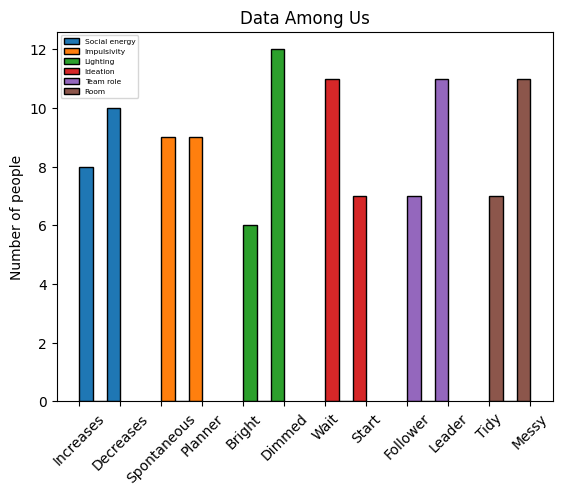

In [101]:
#This chart represents a summary of all the questions and responces conducted in the survey

plt.hist(cta_df.Social_energy, label = 'Social energy', bins = 3, edgecolor='black')
plt.hist(cta_df.Impulsivity, label = 'Impulsivity', bins = 3, edgecolor='black')
plt.hist(cta_df.Lighting, bins = 3, label = 'Lighting', edgecolor='black')
plt.hist(cta_df.Ideation, bins = 3, label = 'Ideation', edgecolor='black')
plt.hist(cta_df.Team_role, bins = 3, label = 'Team role', edgecolor='black')
plt.hist(cta_df.Room, bins = 3, label = 'Room', edgecolor='black')

plt.ylabel('Number of people')
plt.title('Data Among Us')
plt.xticks(rotation=45)
plt.legend(fontsize=5.4)

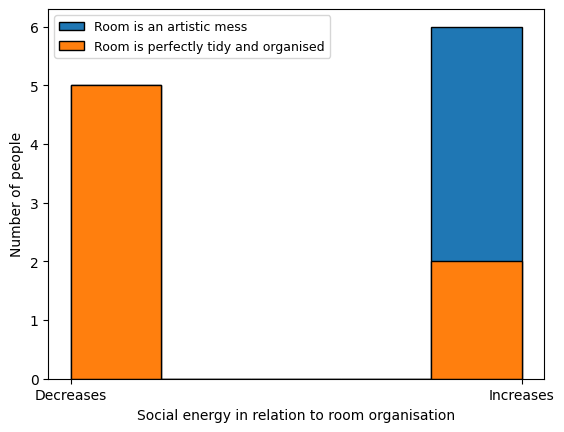

In [104]:
#PART 1 - Room comparison

# Experiment 1 - Social energy in relation to room organisation. 
# Results: the majority of people feeling increase in socal energy have messy rooms.
# However, an equal amount of people feel decrease in social energy have messy and tidy rooms.
# The minority are people with tidy rooms who feel increase in social energy.

cta_room_groupings = cta_df.groupby('Room')
messy_folks = cta_room_groupings.get_group('Messy')
tidy_folks = cta_room_groupings.get_group('Tidy')

plt.hist(messy_folks.Social_energy, bins=5, label='Room is an artistic mess', edgecolor='black')
plt.hist(tidy_folks.Social_energy, bins=5, label='Room is perfectly tidy and organised', edgecolor='black')
plt.xlabel('Social energy in relation to room organisation')
plt.ylabel('Number of people')
plt.legend(fontsize=9)

# In this case the reponses from chart on the left overlapped and I didn't realise that at first, 
# I used alpha parameter to double check the results and then removed it because I prefer vibrant colours! :)

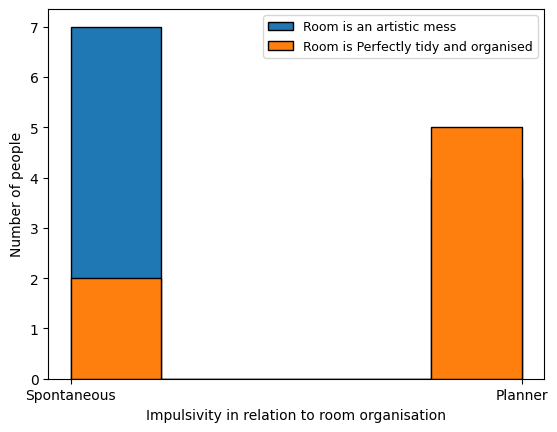

In [105]:
# Experiment 2 - Impulsivity in relation to room organisation. 
# Results: the majority of people are spontaneous and have messy rooms.
# However, an equal amount of planner people have both tidy and messy rooms.
# The minority are people who are spontaneous and have perfectly organised rooms.

plt.hist(messy_folks.Impulsivity, label='Room is an artistic mess', bins=5, edgecolor='black')
plt.hist(tidy_folks.Impulsivity, label='Room is Perfectly tidy and organised', bins=5, edgecolor='black')
plt.xlabel('Impulsivity in relation to room organisation')
plt.ylabel('Number of people')
plt.legend(fontsize=9)

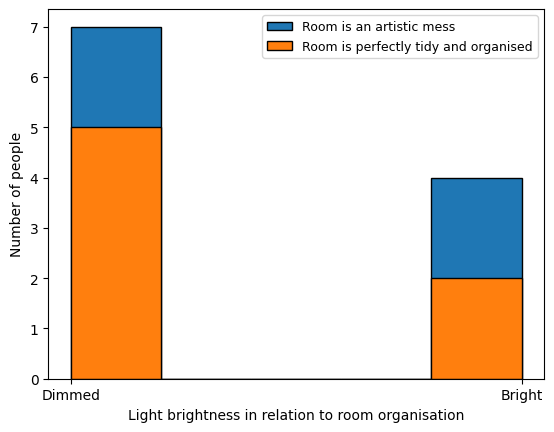

In [107]:
# Experiment 3 - Light brightness in relation to room organisation. 
# Results: The majority are people who prefer dimmed lights and have messy rooms.
# The minority are people who prefer bright lights and have tidy rooms (honestly who are you, I'm kinda scared)

plt.hist(messy_folks.Lighting, label='Room is an artistic mess', bins=5, edgecolor='black')
plt.hist(tidy_folks.Lighting, label='Room is perfectly tidy and organised', bins=5, edgecolor='black')
plt.xlabel('Light brightness in relation to room organisation')
plt.ylabel('Number of people')
plt.legend(fontsize=9)

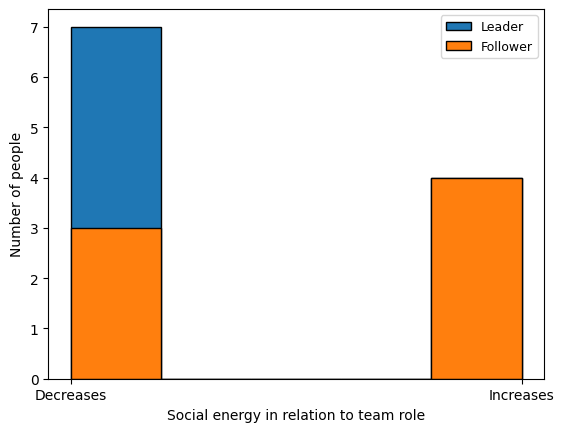

In [119]:
#2 - TEAM ROLE
# Experiment 1 - Social energy in relation to team role. 
# Results: the majority of people feeling decrease in social energy are leaders.
# However, an equal amount of people feeling increase in social energy are followers and leaders.
# The minority are people feeling decrease in social energy are followers.
cta_team_groupings = cta_df.groupby('Team_role')
leader_folks = cta_team_groupings.get_group('Leader')
follower_folks = cta_team_groupings.get_group('Follower')

plt.hist(leader_folks.Social_energy, bins=5, label='Leader', edgecolor='black')
plt.hist(follower_folks.Social_energy, bins=5, label='Follower', edgecolor='black')
plt.xlabel('Social energy in relation to team role')
plt.ylabel('Number of people')
plt.legend(fontsize=9)

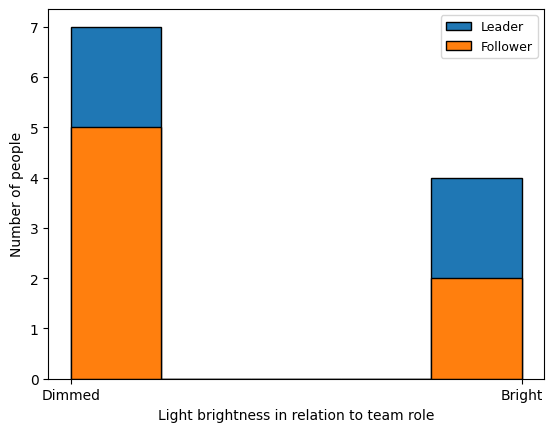

In [120]:
#Experiment 2 - Light brightness in relation to team role. 
#Results: the majority are leaders preferring dimmed light. The minority are followers preferring bright light.

plt.hist(leader_folks.Lighting, bins=5, label='Leader', edgecolor='black')
plt.hist(follower_folks.Lighting, bins=5, label='Follower', edgecolor='black')
plt.xlabel('Light brightness in relation to team role')
plt.ylabel('Number of people')
plt.legend(fontsize=9)